Mauri Leino

# Harjoitustyö vaihe 4 - Datan kuvaileminen

__Pistetavoite: 2__

Tässä harjoitustyön vaiheessa tarkoituksena on kuvailla dataa visuaalisesti.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

Ensin yleiskatsaus käytössä olevaan dataan. Otetaan df.describe ainoastaan tietyistä kolumneista, esimerkiksi koordinaattien keskiarvo tai keskihajonta ei ole erityisen kiinnostava tieto. Esimerkiksi etäisyyksistä taas voi huomata jotain mielenkiintoista.

In [2]:
df.info()
df[['accommodates', 'bedrooms', 'beds', 'price', 'number_of_reviews', 'review_scores_rating', 'review_scores_location', 'cinemas', 'museums', 'pubs', 'musicvenues']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59229 entries, 0 to 59228
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              59229 non-null  int64  
 1   neighbourhood_cleansed  59229 non-null  object 
 2   latitude                59229 non-null  float64
 3   longitude               59229 non-null  float64
 4   room_type               59229 non-null  object 
 5   accommodates            59229 non-null  float64
 6   bedrooms                59229 non-null  float64
 7   beds                    59229 non-null  float64
 8   price                   59229 non-null  float64
 9   number_of_reviews       59229 non-null  float64
 10  review_scores_rating    59229 non-null  float64
 11  review_scores_location  59229 non-null  float64
 12  Barking and Dagenham    59229 non-null  int64  
 13  Barnet                  59229 non-null  int64  
 14  Bexley                  59229 non-null

accommodates      bedrooms          beds         price  \
count  59229.000000  59229.000000  59229.000000  59229.000000   
mean       3.102636      1.501950      1.787199    136.809789   
std        1.962156      0.882996      1.278896    191.612192   
min        1.000000      1.000000      1.000000      7.000000   
25%        2.000000      1.000000      1.000000     46.000000   
50%        2.000000      1.000000      1.000000     85.000000   
75%        4.000000      2.000000      2.000000    150.000000   
max       16.000000     16.000000     38.000000   2000.000000   

       number_of_reviews  review_scores_rating  review_scores_location  \
count       59229.000000          59229.000000            59229.000000   
mean           15.814787              3.334841                3.382744   
std            36.660734              2.157305                2.178500   
min             0.000000              0.000000                0.000000   
25%             0.000000              0.000000                0.000000   
50%             3.000000              4.640000                4.710000   
75%            14.000000              4.950000                5.000000   
max           868.000000              5.000000                5.000000   

            cinemas       museums          pubs   musicvenues  
count  59229.000000  59229.000000  59229.000000  59229.000000  
mean       1.248897      1.383993      0.238742      0.613099  
std        1.095936      1.045321      0.201417      0.596260  
min        0.001870      0.001774      0.000505      0.000577  
25%        0.552522      0.592133      0.100067      0.228908  
50%        0.928058      1.109408      0.182849      0.436305  
75%        1.566515      1.929831      0.314321      0.777627  
max       14.252149      7.738348      2.489126      7.669459

Aloitetaan tarkastelemalla sitä, miten Airbnb-listaukset jakautuvat asuinalueittain

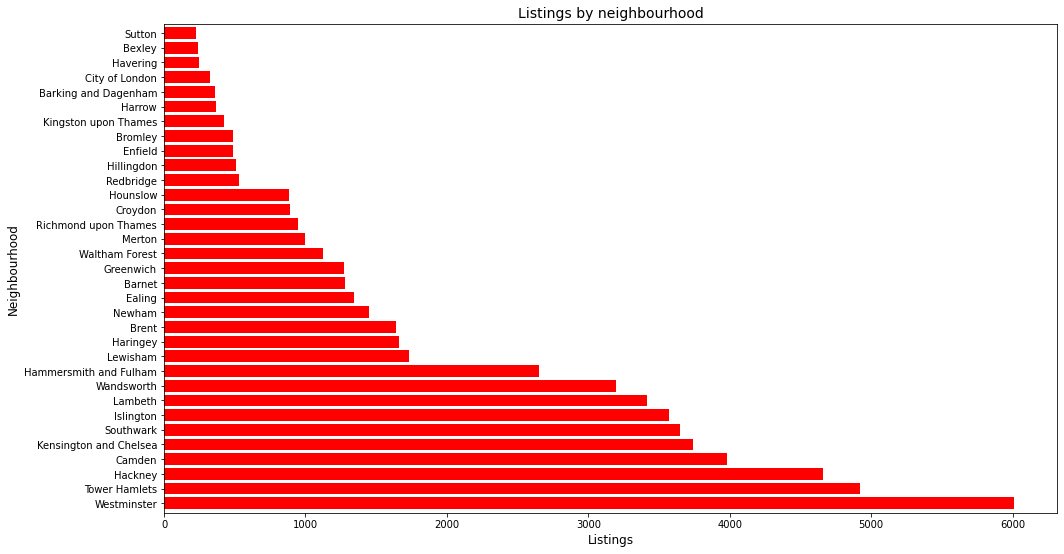

In [3]:
df['neighbourhood_cleansed'].value_counts().plot(kind='barh', color='red', width=0.8, figsize=(16,9))
plt.title('Listings by neighbourhood', fontsize=14)
plt.xlabel('Listings', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12)
plt.show()

Westminsterin alueella on selkeästi eniten asuntoja tarjolla. Tarkastellaan seuraavaksi sitä, miten vuokrakohteiden hinnat muuttuvat asuinalueittain.

Min price:  7.0 , max price:  2000.0 



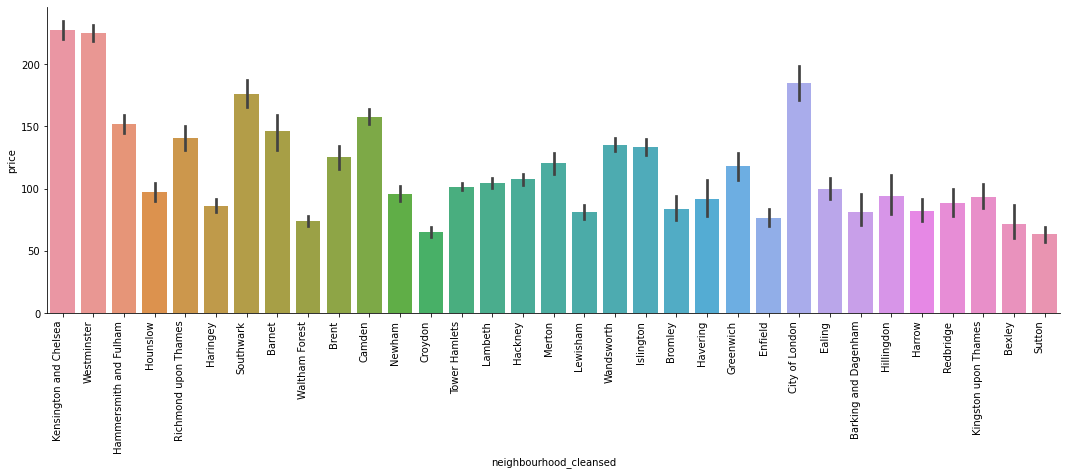

In [4]:
import seaborn as sbn

min_price = df['price'].min()
max_price = df['price'].max()
print("Min price: ", min_price, ", max price: ", max_price, "\n")

price_location = sbn.catplot(kind = 'bar', x = 'neighbourhood_cleansed', y = 'price', data = df, aspect = 3)
price_location.set_xticklabels(rotation = 90, horizontalalignment = 'right')

Kensigntonin ja Chelsean sekä Westminsterin alueilla vaikuttaisi olevan siis keskimäärin kalleimmat vuokrakohteet, kun taas halvimmat löytyvät Croydonin ja Suttonin alueilta. Katsotaan vielä samanlaisilla kuvaajilla, miten huonetyyppi vaikuttaa hintaan ja miten etäisyydet erilaisiin kiinnostaviin kohteisiin muuttuvat asuinalueittain.

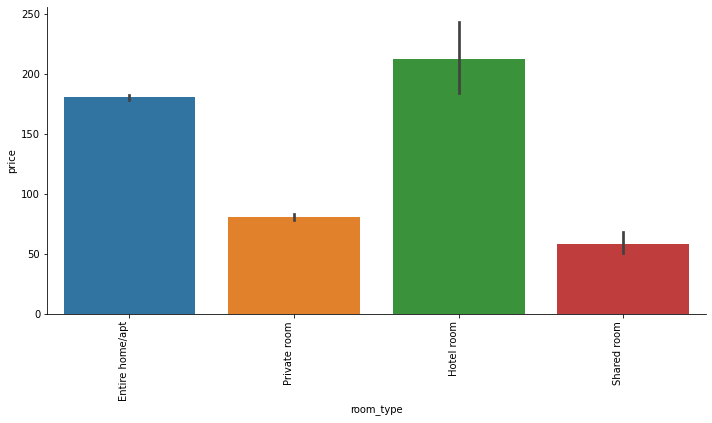

In [15]:
price_location = sbn.catplot(kind = 'bar', x = 'room_type', y = 'price', data = df, aspect = 2)
price_location.set_xticklabels(rotation = 90, horizontalalignment = 'right')

Huonetyyppi vaikuttaa melko odotettavalla tavalla hintaan. Jaetun huoneen saa halvimmalla, yksityisestä huoneesta saa maksaa hieman enemmän, ja mikäli haluaa koko asunnon käyttöönsä, on hyppäys hinnassa melko suuri. Hotellihuone maksaa keskimäärin eniten, mikä ei myöskään ole lopulta kovinkaan yllättävää.

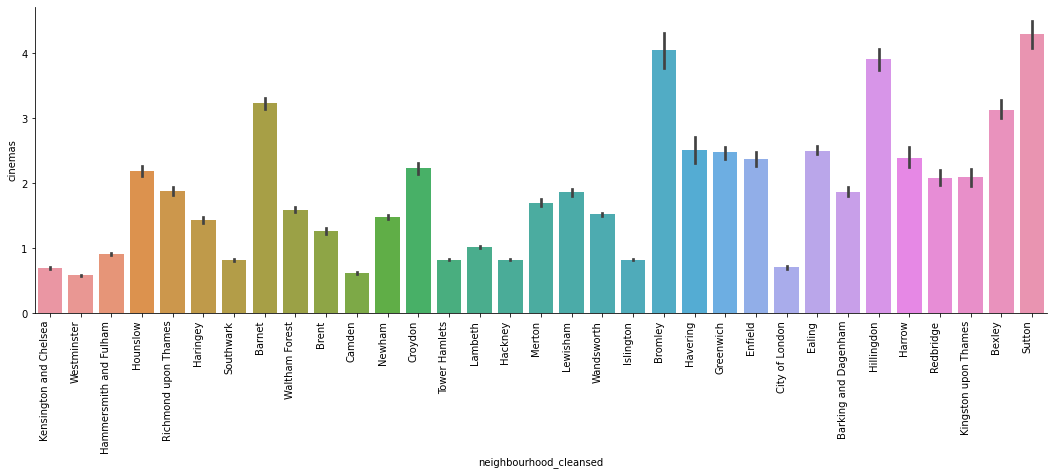

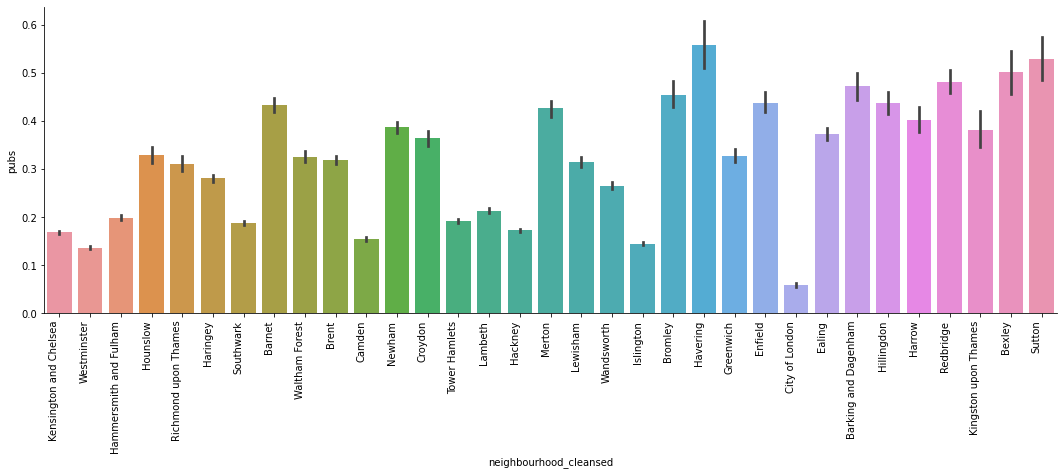

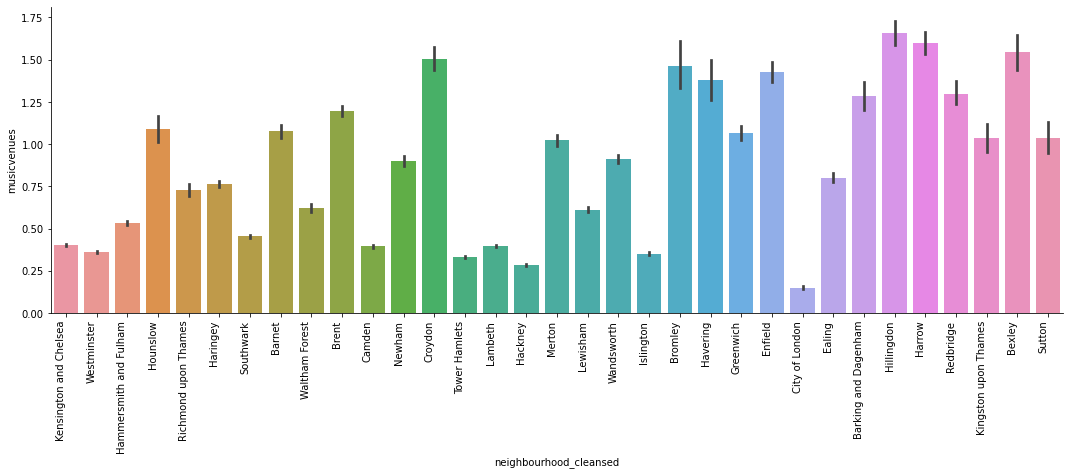

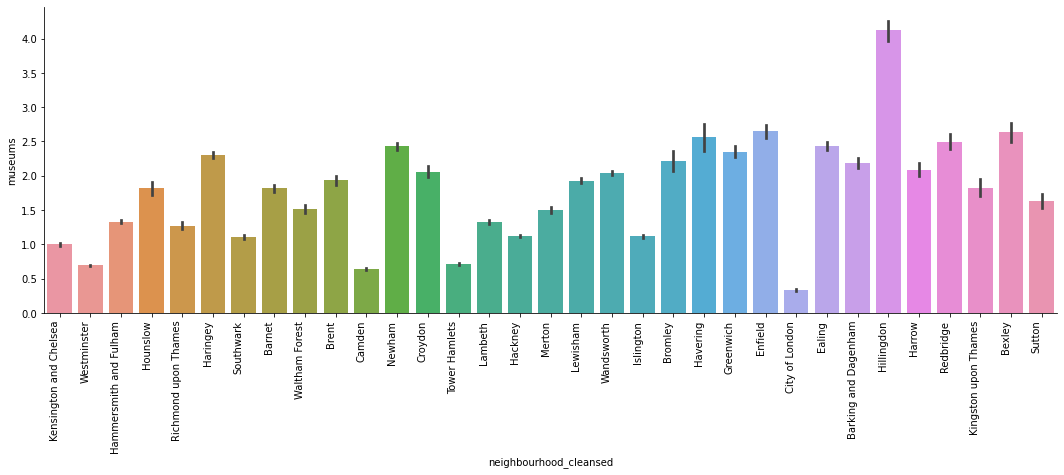

In [5]:
for attraction in ['cinemas', 'pubs', 'musicvenues', 'museums']:
    sbn.catplot(kind = 'bar', x = 'neighbourhood_cleansed', y = attraction, data = df, aspect = 3).set_xticklabels(rotation = 90, horizontalalignment = 'right')

Nähdään, että Lontoon Cityn alueella, aivan Lontoon ytimessä, kaikenlaisia kohteita on hyvin lähellä vuokra-asuntoja. Suttonissa taas vuokrakohteiden alhainen määrä vaikuttaa kenties siihen, että erityisesti elokuvateatterit ja pubit ovat keskimäärin kauempana. Mielenkiintoista olisi nähdä konkreettisesti kartalla niin vuokrakohteet, elokuvateatterit, pubit, museot kuin konserttipaikatkin. Ei muuta kuin tekemään.

In [6]:
import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap

LONDON_COORDINATES=[51.507222, -0.1275]

listings_latitudes = df['latitude'].tolist()
listings_longitudes = df['longitude'].tolist()
listings_roomtype = df['room_type'].to_list()
listings = list(zip(listings_latitudes, listings_longitudes, listings_roomtype))

cinemas_df=pd.read_csv('cinemas.csv', usecols=['name', 'latitude', 'longitude'])
cinemas_latitudes = cinemas_df['latitude'].tolist()
cinemas_longitudes = cinemas_df['longitude'].tolist()
cinemas_names = cinemas_df['name'].tolist()
cinemas = list(zip(cinemas_latitudes, cinemas_longitudes, cinemas_names))

museums_df=pd.read_csv('museums.csv', usecols=['name', 'latitude', 'longitude'])
museums_latitudes = museums_df['latitude'].tolist()
museums_longitudes = museums_df['longitude'].tolist()
museums_names = museums_df['name'].tolist()
museums = list(zip(museums_latitudes, museums_longitudes, museums_names))

pubs_df=pd.read_csv('pubs.csv', usecols=['name', 'latitude', 'longitude'])
pubs_latitudes = pubs_df['latitude'].tolist()
pubs_longitudes = pubs_df['longitude'].tolist()
pubs_names = pubs_df['name'].tolist()
pubs = list(zip(pubs_latitudes, pubs_longitudes, pubs_names))

musicvenues_df=pd.read_csv('musicvenues.csv', usecols=['name', 'latitude', 'longitude'])
musicvenues_latitudes = musicvenues_df['latitude'].tolist()
musicvenues_longitudes = musicvenues_df['longitude'].tolist()
musicvenues_names = musicvenues_df['name'].tolist()
musicvenues = list(zip(musicvenues_latitudes, musicvenues_longitudes, musicvenues_names))

# Map
interactive_map = folium.Map(location=LONDON_COORDINATES, zoom_start=12.5, height=530)

# Custom callbacks to modify markers for different objects
listings_callback= ('function (row) {' 
                'var icon = L.AwesomeMarkers.icon();'
                'var marker = L.marker(new L.LatLng(row[0], row[1]));'
                'marker.setIcon(icon);'
                "var popup = L.popup({maxWidth: '300'});"
                "const display_text = {text: row[2]};"
                "var mytext = $(`<div id='mytext' class='display_text' style='width: 100.0%; height: 100.0%;'> ${display_text.text}</div>`)[0];"
                "popup.setContent(mytext);"
                "marker.bindPopup(popup);"
                'return marker};')

cinemas_callback= ('function (row) {' 
                'var icon = L.AwesomeMarkers.icon({'
                "icon: 'star',"
                "iconColor: 'white',"
                "markerColor: 'black',"
                "prefix: 'glyphicon',"
                "extraClasses: 'fa-rotate-0'"
                    '});'
                'var marker = L.marker(new L.LatLng(row[0], row[1]));'
                'marker.setIcon(icon);'
                "var popup = L.popup({maxWidth: '300'});"
                "const display_text = {text: row[2]};"
                "var mytext = $(`<div id='mytext' class='display_text' style='width: 100.0%; height: 100.0%;'> Cinema: ${display_text.text}</div>`)[0];"
                "popup.setContent(mytext);"
                "marker.bindPopup(popup);"
                'return marker};')

museums_callback= ('function (row) {' 
                'var icon = L.AwesomeMarkers.icon({'
                "icon: 'info-sign',"
                "iconColor: 'white',"
                "markerColor: 'green',"
                "prefix: 'glyphicon',"
                "extraClasses: 'fa-rotate-0'"
                    '});'
                'var marker = L.marker(new L.LatLng(row[0], row[1]));'
                'marker.setIcon(icon);'
                "var popup = L.popup({maxWidth: '300'});"
                "const display_text = {text: row[2]};"
                "var mytext = $(`<div id='mytext' class='display_text' style='width: 100.0%; height: 100.0%;'> Museum: ${display_text.text}</div>`)[0];"
                "popup.setContent(mytext);"
                "marker.bindPopup(popup);"
                'return marker};')

pubs_callback= ('function (row) {' 
                'var icon = L.AwesomeMarkers.icon({'
                "icon: 'glass',"
                "iconColor: 'white',"
                "markerColor: 'purple',"
                "prefix: 'glyphicon',"
                "extraClasses: 'fa-rotate-0'"
                    '});'
                'var marker = L.marker(new L.LatLng(row[0], row[1]));'
                'marker.setIcon(icon);'
                "var popup = L.popup({maxWidth: '300'});"
                "const display_text = {text: row[2]};"
                "var mytext = $(`<div id='mytext' class='display_text' style='width: 100.0%; height: 100.0%;'> Pub: ${display_text.text}</div>`)[0];"
                "popup.setContent(mytext);"
                "marker.bindPopup(popup);"
                'return marker};')

musicvenues_callback= ('function (row) {' 
                'var icon = L.AwesomeMarkers.icon({'
                "icon: 'music',"
                "iconColor: 'white',"
                "markerColor: 'red',"
                "prefix: 'glyphicon',"
                "extraClasses: 'fa-rotate-0'"
                    '});'
                'var marker = L.marker(new L.LatLng(row[0], row[1]));'
                'marker.setIcon(icon);'
                "var popup = L.popup({maxWidth: '300'});"
                "const display_text = {text: row[2]};"
                "var mytext = $(`<div id='mytext' class='display_text' style='width: 100.0%; height: 100.0%;'> Music venue: ${display_text.text}</div>`)[0];"
                "popup.setContent(mytext);"
                "marker.bindPopup(popup);"
                'return marker};')

# Create markers and add them to the map
FastMarkerCluster(data=listings, name='Listing markers', callback=listings_callback).add_to(interactive_map)
FastMarkerCluster(data=cinemas, name='Cinema markers', callback=cinemas_callback).add_to(interactive_map)
FastMarkerCluster(data=museums, name='Museum markers', callback=museums_callback).add_to(interactive_map)
FastMarkerCluster(data=pubs, name='Pub markers', callback=pubs_callback).add_to(interactive_map)
FastMarkerCluster(data=musicvenues, name='Musicvenue markers', callback=musicvenues_callback).add_to(interactive_map)

# Create and add heat map
heat_df = df[['latitude', 'longitude']]
heat_data = [[row['latitude'], row['longitude']] for index, row in heat_df.iterrows()]
HeatMap(heat_data, min_opacity=0.25, name='Listings heat map').add_to(interactive_map)

# Enable layer control
folium.map.LayerControl('topleft', collapsed=False).add_to(interactive_map)

# Show map
interactive_map

Esimerkiksi Lontoon City erottuu heat mapissa alueena, missä vuokrakohteita on vähemmän. Pubeja kuitenkin riittää sielläkin, kuten klustereista nähdään. Erittäin mielenkiintoinen ja hyvin havainnollistava kartta saatiin tuloksena, vaikkakin pienemmällä zoomilla lämpökartta on melko turha, sillä vuokrakohteita on niin paljon että koko Lontoon alue näyttäytyy hehkuvan punaisena. Toisaalta tätä pystyy hieman säätämään HeatMapin min_opacity-attribuutin avulla.

Otetaan ulos vielä pistekuvaajamatriisi, josta nähdään eri muuttujien välillä vallitsevat relaatiot, jos sellaisia on.

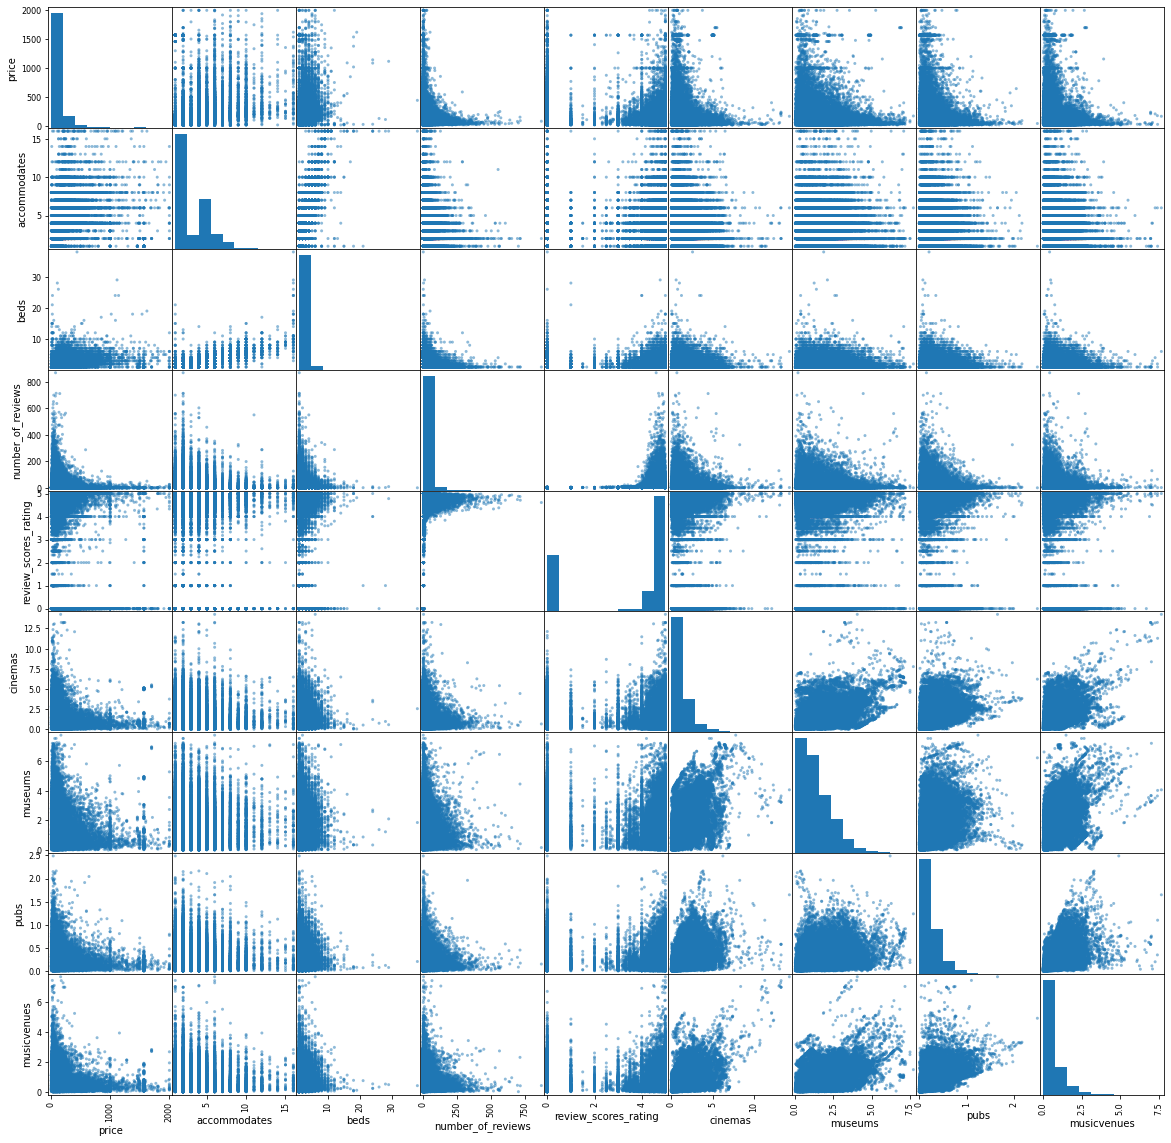

In [11]:
scattercols = ['price', 'accommodates', 'beds', 'number_of_reviews', 'review_scores_rating', 'cinemas', 'museums', 'pubs', 'musicvenues']
axs = pd.plotting.scatter_matrix(df[scattercols], figsize=(20,20))

Mitään suurempia korrelaatioita sirontakuvaajista ei pysty havaitsemaan, mutta kuvaajat ovat yhtä kaikki erittäin mielenkiintoisia. Olisin kenties odottanut selkeämpiä korrelaatioita esimerkiksi etäisyyksien välillä, sekä etäisyyksien ja vuokra-asunnon hinnan välillä.

## Mietteitä ja linkkejä

<ul>
    <li>Tämä vaihe harjoitustyöstä oli erittäin mielenkiintoinen, mutta vei myös jonkin verran aikaa.
    <li>Foliumin ja Seabornin löytäminen aiemmin harjoitustyön tehneiden dokumenteista oli varsinainen lottovoitto, sillä etenkin Seabornilla pylväsdiagrammien tekeminen sujui uskomattoman helposti. Myöskään interaktiivisen kartan lisääminen Foliumin avulla ei ollut lopulta kovin hankalaa, ainoastaan pienten asioiden kuten markkereiden ikonien kanssa sai säätää pidempään. En oikeastaan vieläkään päässyt sinne asti mihin olisin halunnut markkereiden kanssa, mutta dokumentaatio on siltä osin niin heikkoa, että odotusarvoisesti parannuksista tuleva lähinnä kosmeettinen lisäarvo ei olisi niihin kuluvan ajan arvoista.
    <li>Foliumin pikaopas, erinomainen alkuun pääsemiseen: <a href="https://python-visualization.github.io/folium/quickstart.html" target="_blank">https://python-visualization.github.io/folium/quickstart.html</a>
    <li>Esimerkki, jossa niin Foliumia kuin Seabornia: <a href="https://towardsdatascience.com/airbnb-part-b-python-interactive-map-natural-language-processing-48d472f14da3" target="_blank">https://towardsdatascience.com/airbnb-part-b-python-interactive-map-natural-language-processing-48d472f14da3</a>, koodi <a href="https://github.com/Lukastuong123/Python/blob/master/Project-%20Airbnb%20(Python-%20Interactive%20Map%2C%20Natural%20Language%20Processing%2C%20Comparative%20Study%2C%20Regression)/Project.%20AirBnB%20Part%20B%20(Python-%20Interactive%20Map%2C%20Natural%20Language%20Processing)%20.ipynb" target="_blank">GitHubissa</a>.
    <li>Seabornin dokumentaatio: <a href="https://seaborn.pydata.org/tutorial/categorical.html" target="_blank">https://seaborn.pydata.org/tutorial/categorical.html</a>
    <li>Markkereiden muokkaaminen oman callback-funktion avulla: <a href="https://stackoverflow.com/questions/50661316/adding-text-to-folium-fastmarkercluster-markers" target="_blank">https://stackoverflow.com/questions/50661316/adding-text-to-folium-fastmarkercluster-markers</a>
    <li>Leafletin esimerkki, josta saa selville joitakin ikonien nimiä markkereihin: <a href="https://github.com/lennardv2/Leaflet.awesome-markers/blob/2.0/develop/examples/with-bootstrap.html" target="_blank">https://github.com/lennardv2/Leaflet.awesome-markers/blob/2.0/develop/examples/with-bootstrap.html</a>
</ul>